In [1]:
from scSHARP.sc_sharp import scSHARP
from scSHARP.grid_search import GridSearch
import numpy as np

In [2]:
data_path = "simulations/splat_0.7/query_counts.csv.gz"
tool_preds = "simulations/splat_0.7/preds.csv"
tool_list = ["scina", "scsorter", "sctype", "scpred", "singler"]
marker_path = "simulations/splat_0.7/markers.txt"
ref_path = 'simulations/splat_0.7/ref_counts.csv.gz'
ref_label_path = 'simulations/splat_0.7/ref_labels.csv'
neighbors=2
config="configs/2_25.txt"
sharp = scSHARP(data_path, tool_preds, tool_list, marker_path, neighbors, config)

In [3]:
gs = GridSearch(sharp)

In [4]:
# small search
# configs = ['/Users/maxperozek/CP499/scSHARP_tool/scSHARP/configs/2_15.txt', '/Users/maxperozek/CP499/scSHARP_tool/scSHARP/configs/2_25.txt']
# batch_size=[20, 35]
# neighbors=[10, 50]
# dropouts=[0.0]

# really small search
configs = ['/Users/maxperozek/CP499/scSHARP_tool/scSHARP/configs/2_15.txt', '/Users/maxperozek/CP499/scSHARP_tool/scSHARP/configs/2_25.txt']
batch_size=[20]
neighbors=[10]
dropouts=[0.0]

gs_output = gs.model_grid_search(n_workers=4, random_inits=1, configs=configs, batch_size=batch_size, neighbors=neighbors, dropouts=dropouts)

FileNotFoundError: [Errno 2] No such file or directory: 'simulations/splat_0.7/query_counts.csv.gzmarkers.txt'

In [3]:
preds, train_nodes, test_nodes, keep_cells, conf_scores = sharp.run_prediction(training_epochs=30, thresh=0.51, batch_size=20, seed=8)
print(preds[0:10])
print(conf_scores[0:10])

Loss in epoch 0 = 57.780670
Loss in epoch 10 = 0.056038
Loss in epoch 20 = 0.013589
tensor([0, 0, 2, 0, 3, 3, 1, 2, 1, 2])
tensor([1.0000, 1.0000, 0.9998, 1.0000, 1.0000, 0.9999, 1.0000, 0.9999, 1.0000,
        1.0000], grad_fn=<SliceBackward0>)


In [5]:
sharp.save_model('/Users/maxperozek/Desktop/example_model')

In [3]:
sharp.load_model('/Users/maxperozek/Desktop/example_model')

In [6]:
consensus_preds = sharp.knn_consensus()

1


/Users/maxperozek/CP499/scSHARP_tool/scSHARP/utilities.py:317: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  dataset  = torch.utils.data.TensorDataset(torch.tensor(counts), torch.tensor(preds))


2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51


In [14]:
print(consensus_preds.shape)
print(consensus_preds[:10])
print(np.unique(consensus_preds))
print(len(np.where(consensus_preds == -1))) # assuming that -1 is some kind of error

(1000,)
[0. 0. 1. 0. 3. 3. 1. 3. 1. 2.]
[-1.  0.  1.  2.  3.]
1


In [4]:
int_df = sharp.run_interpretation()

ValueError: Expected 2D array, got scalar array instead:
array=nan.
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

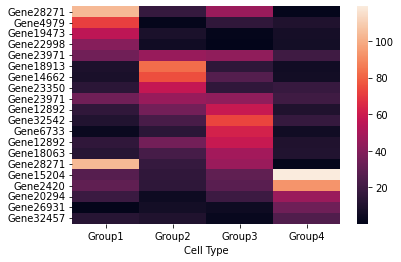

<AxesSubplot:xlabel='Cell Type'>

In [5]:
sharp.heat_map(int_df, n=5)

In [5]:
gs_result = sharp.model_grid_search(4, 3)

Process SpawnPoolWorker-1:
Traceback (most recent call last):
Process SpawnPoolWorker-4:
  File "/Users/maxperozek/opt/anaconda3/envs/thesis/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/maxperozek/opt/anaconda3/envs/thesis/lib/python3.9/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/maxperozek/opt/anaconda3/envs/thesis/lib/python3.9/multiprocessing/pool.py", line 114, in worker
    task = get()
  File "/Users/maxperozek/opt/anaconda3/envs/thesis/lib/python3.9/multiprocessing/queues.py", line 368, in get
    return _ForkingPickler.loads(res)
AttributeError: 'scSHARP' object has no attribute '__single_process_search'
Traceback (most recent call last):
  File "/Users/maxperozek/opt/anaconda3/envs/thesis/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/maxperozek/opt/anaconda3/envs/thesis/lib/python3.9/multiprocessing/process.py", l

KeyboardInterrupt: 